In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib import interp
from scipy import optimize
import time
import scipy.integrate as ode
import random
import math
import pandas as pd

In [11]:
def RightPartSystem(t,y,*parameters):
    c,u,v = y
    A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta = parameters
    
    y_0 = A*c0*u/(c+c0)-u*c*delt/(c+c2)-nu*c*v/(c+c3)-c*m
    y_1 = (B*c/(c+c1)-gamma*u)*u-betta*u*v/(u+h)-sigma*u
    y_2 = etta*c**2/(c**2+c4**2)*betta*u*v/(u+h)-mu*v
        
    return [y_0, y_1, y_2]

def RightRK45(c_0,u_0,v_0,A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,Tmin,Tmax,Graph,Inverse,TimeArray): # Решение прямой задачи методом Р-К 4 порядка с автоматическим выбором шага
    y0=[c_0,u_0,v_0]
    argus=(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta)
    if Inverse == 1:
        solution = ode.solve_ivp ( RightPartSystem, [Tmin, Tmax], y0, method = "Radau",
                                  args=argus, t_eval=TimeArray  )
        C = solution.y[0,:]
        U = solution.y[1,:]
        V = solution.y[2,:]
        T = solution.t
    else:
        solution = ode.solve_ivp ( RightPartSystem, [Tmin, Tmax], y0, method = "Radau", args=argus )
        C = solution.y[0,:]
        U = solution.y[1,:]
        V = solution.y[2,:]
        T = solution.t
    if Graph == 1:
        fig, gr = plt.subplots(figsize=(16, 8))
        gr.plot(T,C,'-o', color='blue', label='c(OXY)')
        gr.plot(T,U,'-o', color='green', label='u(PHYTO)')
        gr.plot(T,V,'-o', color='black', label='v(ZOO)')
        gr.legend()
        gr.grid()
        gr.set_xlabel('Time')
        gr.set_ylabel('c,u,v')
        plt.show()
    result=[C,U,V,T]
    return result

In [68]:
def RightPartSystemAnalys1(t,y,*parameters):
    """
    A
    """
    sq1,sq2,sq3 = y
    A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,T = parameters
    u=np.interp(t,T,U)
    c=np.interp(t,T,C)
    v=np.interp(t,T,V)
    return [
        (-(A*c0*u)/((c+c0)**2) - (delt*c2*u)/((c+c2)**2) - (c3*nu*v)/((c+c3)**2) - m)*sq1 + ((A*c0)/(c0+c) - (c*delt)/(c2+c))*sq2 + (-(c*nu)/(c3+c))*sq3 + (c0*u)/(c0+c), 
        ((B*c1*u)/((c+c1)**2))*sq1 + (-(betta*h*v)/((u+h)**2) - (2*gamma*u) - sigma + (betta*c)/(c+c1))*sq2 + (-(betta*u)/(u+h))*sq3, 
        ((betta*etta*u*v*(2*c*(c**2 + c4**2) - 2*c**3))/((u+h)*(c**2 + c4**2)**2))*sq1 + ((betta*c**2*etta*h*v)/((c4**2 + c**2)*(u + h)**2))*sq2 + ((betta*c**2*etta*u)/((c4**2 + c**2)*(u + h)) - mu)*sq3,
    ]


def RightRK45Analys1(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,Tmin,Tmax,TimeArray,C,U,V): # Решение прямой задачи методом Р-К 4 порядка с автоматическим выбором шага
    """
    A
    """
    y0=[0,0,0]
    argus=(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,TimeArray)
    solution = ode.solve_ivp ( RightPartSystemAnalys1, [Tmin, Tmax], y0, method = "RK45", args=argus, t_eval=TimeArray  )
    Sq1 = solution.y[0,:]
    Sq2 = solution.y[1,:]
    Sq3 = solution.y[2,:]
    T = solution.t
    result=[Sq1,Sq2,Sq3,T]
    return result

def RightPartSystemAnalys2(t,y,*parameters):
    """
    B
    """
    sq1,sq2,sq3 = y
    A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,T = parameters
    u=np.interp(t,T,U)
    c=np.interp(t,T,C)
    v=np.interp(t,T,V)
    return [
        (-(A*c0*u)/((c+c0)**2) - (delt*c2*u)/((c+c2)**2) - (c3*nu*v)/((c+c3)**2) - m)*sq1 + ((A*c0)/(c0+c) - (c*delt)/(c2+c))*sq2 + (-(c*nu)/(c3+c))*sq3, 
        ((B*c1*u)/((c+c1)**2))*sq1 + (-(betta*h*v)/((u+h)**2) - (2*gamma*u) - sigma + (betta*c)/(c+c1))*sq2 + (-(betta*u)/(u+h))*sq3 + (c*u)/(c1+c), 
        ((betta*etta*u*v*(2*c*(c**2 + c4**2) - 2*c**3))/((u+h)*(c**2 + c4**2)**2))*sq1 + ((betta*c**2*etta*h*v)/((c4**2 + c**2)*(u + h)**2))*sq2 + ((betta*c**2*etta*u)/((c4**2 + c**2)*(u + h)) - mu)*sq3,
    ]


def RightRK45Analys2(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,Tmin,Tmax,TimeArray,C,U,V): # Решение прямой задачи методом Р-К 4 порядка с автоматическим выбором шага
    """
    B
    """
    y0=[0,0,0]
    argus=(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,TimeArray)
    solution = ode.solve_ivp ( RightPartSystemAnalys2, [Tmin, Tmax], y0, method = "RK45", args=argus, t_eval=TimeArray  )
    Sq1 = solution.y[0,:]
    Sq2 = solution.y[1,:]
    Sq3 = solution.y[2,:]
    T = solution.t
    result=[Sq1,Sq2,Sq3,T]
    return result


def RightPartSystemAnalys3(t,y,*parameters):
    """
    delt
    """
    sq1,sq2,sq3 = y
    A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,T = parameters
    u=np.interp(t,T,U)
    c=np.interp(t,T,C)
    v=np.interp(t,T,V)
    return [
        (-(A*c0*u)/((c+c0)**2) - (delt*c2*u)/((c+c2)**2) - (c3*nu*v)/((c+c3)**2) - m)*sq1 + ((A*c0)/(c0+c) - (c*delt)/(c2+c))*sq2 + (-(c*nu)/(c3+c))*sq3 - (c*u)/(c2+c), 
        ((B*c1*u)/((c+c1)**2))*sq1 + (-(betta*h*v)/((u+h)**2) - (2*gamma*u) - sigma + (betta*c)/(c+c1))*sq2 + (-(betta*u)/(u+h))*sq3, 
        ((betta*etta*u*v*(2*c*(c**2 + c4**2) - 2*c**3))/((u+h)*(c**2 + c4**2)**2))*sq1 + ((betta*c**2*etta*h*v)/((c4**2 + c**2)*(u + h)**2))*sq2 + ((betta*c**2*etta*u)/((c4**2 + c**2)*(u + h)) - mu)*sq3,
    ]


def RightRK45Analys3(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,Tmin,Tmax,TimeArray,C,U,V): # Решение прямой задачи методом Р-К 4 порядка с автоматическим выбором шага
    """
    delt
    """
    y0=[0,0,0]
    argus=(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,TimeArray)
    solution = ode.solve_ivp ( RightPartSystemAnalys3, [Tmin, Tmax], y0, method = "RK45", args=argus, t_eval=TimeArray  )
    Sq1 = solution.y[0,:]
    Sq2 = solution.y[1,:]
    Sq3 = solution.y[2,:]
    T = solution.t
    result=[Sq1,Sq2,Sq3,T]
    return result


def RightPartSystemAnalys4(t,y,*parameters):
    """
    c0
    """
    sq1,sq2,sq3 = y
    A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,T = parameters
    u=np.interp(t,T,U)
    c=np.interp(t,T,C)
    v=np.interp(t,T,V)
    return [
        (-(A*c0*u)/((c+c0)**2) - (delt*c2*u)/((c+c2)**2) - (c3*nu*v)/((c+c3)**2) - m)*sq1 + ((A*c0)/(c0+c) - (c*delt)/(c2+c))*sq2 + (-(c*nu)/(c3+c))*sq3 + (A*c*u)/((c0+c)**2), 
        ((B*c1*u)/((c+c1)**2))*sq1 + (-(betta*h*v)/((u+h)**2) - (2*gamma*u) - sigma + (betta*c)/(c+c1))*sq2 + (-(betta*u)/(u+h))*sq3, 
        ((betta*etta*u*v*(2*c*(c**2 + c4**2) - 2*c**3))/((u+h)*(c**2 + c4**2)**2))*sq1 + ((betta*c**2*etta*h*v)/((c4**2 + c**2)*(u + h)**2))*sq2 + ((betta*c**2*etta*u)/((c4**2 + c**2)*(u + h)) - mu)*sq3,
    ]


def RightRK45Analys4(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,Tmin,Tmax,TimeArray,C,U,V): # Решение прямой задачи методом Р-К 4 порядка с автоматическим выбором шага
    """
    c0
    """
    y0=[0,0,0]
    argus=(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,TimeArray)
    solution = ode.solve_ivp ( RightPartSystemAnalys4, [Tmin, Tmax], y0, method = "RK45", args=argus, t_eval=TimeArray  )
    Sq1 = solution.y[0,:]
    Sq2 = solution.y[1,:]
    Sq3 = solution.y[2,:]
    T = solution.t
    result=[Sq1,Sq2,Sq3,T]
    return result


def RightPartSystemAnalys5(t,y,*parameters):
    """
    c1
    """
    sq1,sq2,sq3 = y
    A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,T = parameters
    u=np.interp(t,T,U)
    c=np.interp(t,T,C)
    v=np.interp(t,T,V)
    return [
        (-(A*c0*u)/((c+c0)**2) - (delt*c2*u)/((c+c2)**2) - (c3*nu*v)/((c+c3)**2) - m)*sq1 + ((A*c0)/(c0+c) - (c*delt)/(c2+c))*sq2 + (-(c*nu)/(c3+c))*sq3, 
        ((B*c1*u)/((c+c1)**2))*sq1 + (-(betta*h*v)/((u+h)**2) - (2*gamma*u) - sigma + (betta*c)/(c+c1))*sq2 + (-(betta*u)/(u+h))*sq3 - (betta*c*u)/((c1+c)**2), 
        ((betta*etta*u*v*(2*c*(c**2 + c4**2) - 2*c**3))/((u+h)*(c**2 + c4**2)**2))*sq1 + ((betta*c**2*etta*h*v)/((c4**2 + c**2)*(u + h)**2))*sq2 + ((betta*c**2*etta*u)/((c4**2 + c**2)*(u + h)) - mu)*sq3,
    ]


def RightRK45Analys5(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,Tmin,Tmax,TimeArray,C,U,V): # Решение прямой задачи методом Р-К 4 порядка с автоматическим выбором шага
    """
    c1
    """
    y0=[0,0,0]
    argus=(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,TimeArray)
    solution = ode.solve_ivp ( RightPartSystemAnalys5, [Tmin, Tmax], y0, method = "RK45", args=argus, t_eval=TimeArray  )
    Sq1 = solution.y[0,:]
    Sq2 = solution.y[1,:]
    Sq3 = solution.y[2,:]
    T = solution.t
    result=[Sq1,Sq2,Sq3,T]
    return result


def RightPartSystemAnalys6(t,y,*parameters):
    """
    c2
    """
    sq1,sq2,sq3 = y
    A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,T = parameters
    u=np.interp(t,T,U)
    c=np.interp(t,T,C)
    v=np.interp(t,T,V)
    return [
        (-(A*c0*u)/((c+c0)**2) - (delt*c2*u)/((c+c2)**2) - (c3*nu*v)/((c+c3)**2) - m)*sq1 + ((A*c0)/(c0+c) - (c*delt)/(c2+c))*sq2 + (-(c*nu)/(c3+c))*sq3 + (c*delt*u)/((c2+c)**2), 
        ((B*c1*u)/((c+c1)**2))*sq1 + (-(betta*h*v)/((u+h)**2) - (2*gamma*u) - sigma + (betta*c)/(c+c1))*sq2 + (-(betta*u)/(u+h))*sq3, 
        ((betta*etta*u*v*(2*c*(c**2 + c4**2) - 2*c**3))/((u+h)*(c**2 + c4**2)**2))*sq1 + ((betta*c**2*etta*h*v)/((c4**2 + c**2)*(u + h)**2))*sq2 + ((betta*c**2*etta*u)/((c4**2 + c**2)*(u + h)) - mu)*sq3,
    ]


def RightRK45Analys6(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,Tmin,Tmax,TimeArray,C,U,V): # Решение прямой задачи методом Р-К 4 порядка с автоматическим выбором шага
    """
    c2
    """
    y0=[0,0,0]
    argus=(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,TimeArray)
    solution = ode.solve_ivp ( RightPartSystemAnalys6, [Tmin, Tmax], y0, method = "RK45", args=argus, t_eval=TimeArray  )
    Sq1 = solution.y[0,:]
    Sq2 = solution.y[1,:]
    Sq3 = solution.y[2,:]
    T = solution.t
    result=[Sq1,Sq2,Sq3,T]
    return result


def RightPartSystemAnalys7(t,y,*parameters):
    """
    c3
    """
    sq1,sq2,sq3 = y
    A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,T = parameters
    u=np.interp(t,T,U)
    c=np.interp(t,T,C)
    v=np.interp(t,T,V)
    return [
        (-(A*c0*u)/((c+c0)**2) - (delt*c2*u)/((c+c2)**2) - (c3*nu*v)/((c+c3)**2) - m)*sq1 + ((A*c0)/(c0+c) - (c*delt)/(c2+c))*sq2 + (-(c*nu)/(c3+c))*sq3 + (c*nu*v)/((c3+c)**2), 
        ((B*c1*u)/((c+c1)**2))*sq1 + (-(betta*h*v)/((u+h)**2) - (2*gamma*u) - sigma + (betta*c)/(c+c1))*sq2 + (-(betta*u)/(u+h))*sq3, 
        ((betta*etta*u*v*(2*c*(c**2 + c4**2) - 2*c**3))/((u+h)*(c**2 + c4**2)**2))*sq1 + ((betta*c**2*etta*h*v)/((c4**2 + c**2)*(u + h)**2))*sq2 + ((betta*c**2*etta*u)/((c4**2 + c**2)*(u + h)) - mu)*sq3,
    ]


def RightRK45Analys7(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,Tmin,Tmax,TimeArray,C,U,V): # Решение прямой задачи методом Р-К 4 порядка с автоматическим выбором шага
    """
    c3
    """
    y0=[0,0,0]
    argus=(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,TimeArray)
    solution = ode.solve_ivp ( RightPartSystemAnalys7, [Tmin, Tmax], y0, method = "RK45", args=argus, t_eval=TimeArray  )
    Sq1 = solution.y[0,:]
    Sq2 = solution.y[1,:]
    Sq3 = solution.y[2,:]
    T = solution.t
    result=[Sq1,Sq2,Sq3,T]
    return result


def RightPartSystemAnalys8(t,y,*parameters):
    """
    c4
    """
    sq1,sq2,sq3 = y
    A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,T = parameters
    u=np.interp(t,T,U)
    c=np.interp(t,T,C)
    v=np.interp(t,T,V)
    return [
        (-(A*c0*u)/((c+c0)**2) - (delt*c2*u)/((c+c2)**2) - (c3*nu*v)/((c+c3)**2) - m)*sq1 + ((A*c0)/(c0+c) - (c*delt)/(c2+c))*sq2 + (-(c*nu)/(c3+c))*sq3, 
        ((B*c1*u)/((c+c1)**2))*sq1 + (-(betta*h*v)/((u+h)**2) - (2*gamma*u) - sigma + (betta*c)/(c+c1))*sq2 + (-(betta*u)/(u+h))*sq3, 
        ((betta*etta*u*v*(2*c*(c**2 + c4**2) - 2*c**3))/((u+h)*(c**2 + c4**2)**2))*sq1 + ((betta*c**2*etta*h*v)/((c4**2 + c**2)*(u + h)**2))*sq2 + ((betta*c**2*etta*u)/((c4**2 + c**2)*(u + h)) - mu)*sq3 - (2*betta*c**2*etta*u*v*c4)/((u+h)*(c4**2+c**2)**2),
    ]


def RightRK45Analys8(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,Tmin,Tmax,TimeArray,C,U,V): # Решение прямой задачи методом Р-К 4 порядка с автоматическим выбором шага
    """
    c4
    """
    y0=[0,0,0]
    argus=(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,TimeArray)
    solution = ode.solve_ivp ( RightPartSystemAnalys8, [Tmin, Tmax], y0, method = "RK45", args=argus, t_eval=TimeArray  )
    Sq1 = solution.y[0,:]
    Sq2 = solution.y[1,:]
    Sq3 = solution.y[2,:]
    T = solution.t
    result=[Sq1,Sq2,Sq3,T]
    return result


def RightPartSystemAnalys9(t,y,*parameters):
    """
    nu
    """
    sq1,sq2,sq3 = y
    A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,T = parameters
    u=np.interp(t,T,U)
    c=np.interp(t,T,C)
    v=np.interp(t,T,V)
    return [
        (-(A*c0*u)/((c+c0)**2) - (delt*c2*u)/((c+c2)**2) - (c3*nu*v)/((c+c3)**2) - m)*sq1 + ((A*c0)/(c0+c) - (c*delt)/(c2+c))*sq2 + (-(c*nu)/(c3+c))*sq3 - (c*v)/(c+c3), 
        ((B*c1*u)/((c+c1)**2))*sq1 + (-(betta*h*v)/((u+h)**2) - (2*gamma*u) - sigma + (betta*c)/(c+c1))*sq2 + (-(betta*u)/(u+h))*sq3, 
        ((betta*etta*u*v*(2*c*(c**2 + c4**2) - 2*c**3))/((u+h)*(c**2 + c4**2)**2))*sq1 + ((betta*c**2*etta*h*v)/((c4**2 + c**2)*(u + h)**2))*sq2 + ((betta*c**2*etta*u)/((c4**2 + c**2)*(u + h)) - mu)*sq3,
    ]


def RightRK45Analys9(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,Tmin,Tmax,TimeArray,C,U,V): # Решение прямой задачи методом Р-К 4 порядка с автоматическим выбором шага
    """
    nu
    """
    y0=[0,0,0]
    argus=(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,TimeArray)
    solution = ode.solve_ivp ( RightPartSystemAnalys9, [Tmin, Tmax], y0, method = "RK45", args=argus, t_eval=TimeArray  )
    Sq1 = solution.y[0,:]
    Sq2 = solution.y[1,:]
    Sq3 = solution.y[2,:]
    T = solution.t
    result=[Sq1,Sq2,Sq3,T]
    return result


def RightPartSystemAnalys10(t,y,*parameters):
    """
    h
    """
    sq1,sq2,sq3 = y
    A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,T = parameters
    u=np.interp(t,T,U)
    c=np.interp(t,T,C)
    v=np.interp(t,T,V)
    return [
        (-(A*c0*u)/((c+c0)**2) - (delt*c2*u)/((c+c2)**2) - (c3*nu*v)/((c+c3)**2) - m)*sq1 + ((A*c0)/(c0+c) - (c*delt)/(c2+c))*sq2 + (-(c*nu)/(c3+c))*sq3, 
        ((B*c1*u)/((c+c1)**2))*sq1 + (-(betta*h*v)/((u+h)**2) - (2*gamma*u) - sigma + (betta*c)/(c+c1))*sq2 + (-(betta*u)/(u+h))*sq3 + (betta*u*v)/((u+h)**2), 
        ((betta*etta*u*v*(2*c*(c**2 + c4**2) - 2*c**3))/((u+h)*(c**2 + c4**2)**2))*sq1 + ((betta*c**2*etta*h*v)/((c4**2 + c**2)*(u + h)**2))*sq2 + ((betta*c**2*etta*u)/((c4**2 + c**2)*(u + h)) - mu)*sq3 - (betta*c**2*etta*u*v)/((c**2+c4**2)*(u+h)**2),
    ]


def RightRK45Analys10(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,Tmin,Tmax,TimeArray,C,U,V): # Решение прямой задачи методом Р-К 4 порядка с автоматическим выбором шага
    """
    h
    """
    y0=[0,0,0]
    argus=(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,TimeArray)
    solution = ode.solve_ivp ( RightPartSystemAnalys10, [Tmin, Tmax], y0, method = "RK45", args=argus, t_eval=TimeArray  )
    Sq1 = solution.y[0,:]
    Sq2 = solution.y[1,:]
    Sq3 = solution.y[2,:]
    T = solution.t
    result=[Sq1,Sq2,Sq3,T]
    return result


def RightPartSystemAnalys11(t,y,*parameters):
    """
    sigma
    """
    sq1,sq2,sq3 = y
    A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,T = parameters
    u=np.interp(t,T,U)
    c=np.interp(t,T,C)
    v=np.interp(t,T,V)
    return [
        (-(A*c0*u)/((c+c0)**2) - (delt*c2*u)/((c+c2)**2) - (c3*nu*v)/((c+c3)**2) - m)*sq1 + ((A*c0)/(c0+c) - (c*delt)/(c2+c))*sq2 + (-(c*nu)/(c3+c))*sq3, 
        ((B*c1*u)/((c+c1)**2))*sq1 + (-(betta*h*v)/((u+h)**2) - (2*gamma*u) - sigma + (betta*c)/(c+c1))*sq2 + (-(betta*u)/(u+h))*sq3 - u, 
        ((betta*etta*u*v*(2*c*(c**2 + c4**2) - 2*c**3))/((u+h)*(c**2 + c4**2)**2))*sq1 + ((betta*c**2*etta*h*v)/((c4**2 + c**2)*(u + h)**2))*sq2 + ((betta*c**2*etta*u)/((c4**2 + c**2)*(u + h)) - mu)*sq3,
    ]


def RightRK45Analys11(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,Tmin,Tmax,TimeArray,C,U,V): # Решение прямой задачи методом Р-К 4 порядка с автоматическим выбором шага
    """
    sigma
    """
    y0=[0,0,0]
    argus=(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,TimeArray)
    solution = ode.solve_ivp ( RightPartSystemAnalys11, [Tmin, Tmax], y0, method = "RK45", args=argus, t_eval=TimeArray  )
    Sq1 = solution.y[0,:]
    Sq2 = solution.y[1,:]
    Sq3 = solution.y[2,:]
    T = solution.t
    result=[Sq1,Sq2,Sq3,T]
    return result


def RightPartSystemAnalys12(t,y,*parameters):
    """
    etta
    """
    sq1,sq2,sq3 = y
    A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,T = parameters
    u=np.interp(t,T,U)
    c=np.interp(t,T,C)
    v=np.interp(t,T,V)
    return [
        (-(A*c0*u)/((c+c0)**2) - (delt*c2*u)/((c+c2)**2) - (c3*nu*v)/((c+c3)**2) - m)*sq1 + ((A*c0)/(c0+c) - (c*delt)/(c2+c))*sq2 + (-(c*nu)/(c3+c))*sq3, 
        ((B*c1*u)/((c+c1)**2))*sq1 + (-(betta*h*v)/((u+h)**2) - (2*gamma*u) - sigma + (betta*c)/(c+c1))*sq2 + (-(betta*u)/(u+h))*sq3, 
        ((betta*etta*u*v*(2*c*(c**2 + c4**2) - 2*c**3))/((u+h)*(c**2 + c4**2)**2))*sq1 + ((betta*c**2*etta*h*v)/((c4**2 + c**2)*(u + h)**2))*sq2 + ((betta*c**2*etta*u)/((c4**2 + c**2)*(u + h)) - mu)*sq3 + (betta*c**2*u*v)/((c**2+c4**2)*(u+h)),
    ]


def RightRK45Analys12(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,Tmin,Tmax,TimeArray,C,U,V): # Решение прямой задачи методом Р-К 4 порядка с автоматическим выбором шага
    """
    etta
    """
    y0=[0,0,0]
    argus=(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,TimeArray)
    solution = ode.solve_ivp ( RightPartSystemAnalys12, [Tmin, Tmax], y0, method = "RK45", args=argus, t_eval=TimeArray  )
    Sq1 = solution.y[0,:]
    Sq2 = solution.y[1,:]
    Sq3 = solution.y[2,:]
    T = solution.t
    result=[Sq1,Sq2,Sq3,T]
    return result


def RightPartSystemAnalys13(t,y,*parameters):
    """
    mu
    """
    sq1,sq2,sq3 = y
    A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,T = parameters
    u=np.interp(t,T,U)
    c=np.interp(t,T,C)
    v=np.interp(t,T,V)
    return [
        (-(A*c0*u)/((c+c0)**2) - (delt*c2*u)/((c+c2)**2) - (c3*nu*v)/((c+c3)**2) - m)*sq1 + ((A*c0)/(c0+c) - (c*delt)/(c2+c))*sq2 + (-(c*nu)/(c3+c))*sq3, 
        ((B*c1*u)/((c+c1)**2))*sq1 + (-(betta*h*v)/((u+h)**2) - (2*gamma*u) - sigma + (betta*c)/(c+c1))*sq2 + (-(betta*u)/(u+h))*sq3, 
        ((betta*etta*u*v*(2*c*(c**2 + c4**2) - 2*c**3))/((u+h)*(c**2 + c4**2)**2))*sq1 + ((betta*c**2*etta*h*v)/((c4**2 + c**2)*(u + h)**2))*sq2 + ((betta*c**2*etta*u)/((c4**2 + c**2)*(u + h)) - mu)*sq3 - v,
    ]


def RightRK45Analys13(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,Tmin,Tmax,TimeArray,C,U,V): # Решение прямой задачи методом Р-К 4 порядка с автоматическим выбором шага
    """
    mu
    """
    y0=[0,0,0]
    argus=(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,TimeArray)
    solution = ode.solve_ivp ( RightPartSystemAnalys13, [Tmin, Tmax], y0, method = "RK45", args=argus, t_eval=TimeArray  )
    Sq1 = solution.y[0,:]
    Sq2 = solution.y[1,:]
    Sq3 = solution.y[2,:]
    T = solution.t
    result=[Sq1,Sq2,Sq3,T]
    return result


def RightPartSystemAnalys14(t,y,*parameters):
    """
    m
    """
    sq1,sq2,sq3 = y
    A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,T = parameters
    u=np.interp(t,T,U)
    c=np.interp(t,T,C)
    v=np.interp(t,T,V)
    return [
        (-(A*c0*u)/((c+c0)**2) - (delt*c2*u)/((c+c2)**2) - (c3*nu*v)/((c+c3)**2) - m)*sq1 + ((A*c0)/(c0+c) - (c*delt)/(c2+c))*sq2 + (-(c*nu)/(c3+c))*sq3 - c, 
        ((B*c1*u)/((c+c1)**2))*sq1 + (-(betta*h*v)/((u+h)**2) - (2*gamma*u) - sigma + (betta*c)/(c+c1))*sq2 + (-(betta*u)/(u+h))*sq3, 
        ((betta*etta*u*v*(2*c*(c**2 + c4**2) - 2*c**3))/((u+h)*(c**2 + c4**2)**2))*sq1 + ((betta*c**2*etta*h*v)/((c4**2 + c**2)*(u + h)**2))*sq2 + ((betta*c**2*etta*u)/((c4**2 + c**2)*(u + h)) - mu)*sq3,
    ]


def RightRK45Analys14(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,Tmin,Tmax,TimeArray,C,U,V): # Решение прямой задачи методом Р-К 4 порядка с автоматическим выбором шага
    """
    m
    """
    y0=[0,0,0]
    argus=(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,TimeArray)
    solution = ode.solve_ivp ( RightPartSystemAnalys14, [Tmin, Tmax], y0, method = "RK45", args=argus, t_eval=TimeArray  )
    Sq1 = solution.y[0,:]
    Sq2 = solution.y[1,:]
    Sq3 = solution.y[2,:]
    T = solution.t
    result=[Sq1,Sq2,Sq3,T]
    return result


def RightPartSystemAnalys15(t,y,*parameters):
    """
    gamma
    """
    sq1,sq2,sq3 = y
    A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,T = parameters
    u=np.interp(t,T,U)
    c=np.interp(t,T,C)
    v=np.interp(t,T,V)
    return [
        (-(A*c0*u)/((c+c0)**2) - (delt*c2*u)/((c+c2)**2) - (c3*nu*v)/((c+c3)**2) - m)*sq1 + ((A*c0)/(c0+c) - (c*delt)/(c2+c))*sq2 + (-(c*nu)/(c3+c))*sq3, 
        ((B*c1*u)/((c+c1)**2))*sq1 + (-(betta*h*v)/((u+h)**2) - (2*gamma*u) - sigma + (betta*c)/(c+c1))*sq2 + (-(betta*u)/(u+h))*sq3 - u**2, 
        ((betta*etta*u*v*(2*c*(c**2 + c4**2) - 2*c**3))/((u+h)*(c**2 + c4**2)**2))*sq1 + ((betta*c**2*etta*h*v)/((c4**2 + c**2)*(u + h)**2))*sq2 + ((betta*c**2*etta*u)/((c4**2 + c**2)*(u + h)) - mu)*sq3,
    ]


def RightRK45Analys15(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,Tmin,Tmax,TimeArray,C,U,V): # Решение прямой задачи методом Р-К 4 порядка с автоматическим выбором шага
    """
    gamma
    """
    y0=[0,0,0]
    argus=(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,TimeArray)
    solution = ode.solve_ivp ( RightPartSystemAnalys15, [Tmin, Tmax], y0, method = "RK45", args=argus, t_eval=TimeArray  )
    Sq1 = solution.y[0,:]
    Sq2 = solution.y[1,:]
    Sq3 = solution.y[2,:]
    T = solution.t
    result=[Sq1,Sq2,Sq3,T]
    return result


def RightPartSystemAnalys16(t,y,*parameters):
    """
    betta
    """
    sq1,sq2,sq3 = y
    A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,T = parameters
    u=np.interp(t,T,U)
    c=np.interp(t,T,C)
    v=np.interp(t,T,V)
    return [
        (-(A*c0*u)/((c+c0)**2) - (delt*c2*u)/((c+c2)**2) - (c3*nu*v)/((c+c3)**2) - m)*sq1 + ((A*c0)/(c0+c) - (c*delt)/(c2+c))*sq2 + (-(c*nu)/(c3+c))*sq3, 
        ((B*c1*u)/((c+c1)**2))*sq1 + (-(betta*h*v)/((u+h)**2) - (2*gamma*u) - sigma + (betta*c)/(c+c1))*sq2 + (-(betta*u)/(u+h))*sq3 - (u*v)/(u+h), 
        ((betta*etta*u*v*(2*c*(c**2 + c4**2) - 2*c**3))/((u+h)*(c**2 + c4**2)**2))*sq1 + ((betta*c**2*etta*h*v)/((c4**2 + c**2)*(u + h)**2))*sq2 + ((betta*c**2*etta*u)/((c4**2 + c**2)*(u + h)) - mu)*sq3 + (c**2*etta*u*v)/((c**2+c4**2)*(u+h)),
    ]


def RightRK45Analys16(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,Tmin,Tmax,TimeArray,C,U,V): # Решение прямой задачи методом Р-К 4 порядка с автоматическим выбором шага
    """
    betta
    """
    y0=[0,0,0]
    argus=(A,B,delt,c0,c1,c2,c3,c4,nu,h,sigma,etta,mu,m,gamma,betta,C,U,V,TimeArray)
    solution = ode.solve_ivp(RightPartSystemAnalys16, [Tmin, Tmax], y0, method = "RK45", args=argus, t_eval=TimeArray)
    Sq1 = solution.y[0,:]
    Sq2 = solution.y[1,:]
    Sq3 = solution.y[2,:]
    T = solution.t
    result=[Sq1,Sq2,Sq3,T]
    return result


def MaxStolb(A):
    n = A.shape[0]
    m = A.shape[1]
    l = 0
    max0 = 0
    for i in range(m):
        max=0
        for j in range(n):
            max += A[j, i]**2
        if max >= max0:
            max0 = max
            l = i
    return l, max0

def Projection(S, E):
    m = E.shape[1]
    n = E.shape[0]
    Sproj = np.zeros(n)
    Sproj = np.matrix(Sproj)
    Sproj = np.transpose(Sproj)
    for i in range(m):
        Sproj += E[:, i]*np.dot(S.T, E[:, i])/np.dot(E[:, i].T, E[:, i])
    return Sproj

# def SensAnalysis(S):
#     n = S.shape[0]
#     m = S.shape[1]
    
#     NoIdent = np.matrix((np.array(range(1, m + 1))))
    
#     MAX = MaxStolb(S)
#     NoIdent = np.delete(NoIdent, MAX[0])
#     Ident = np.transpose(np.matrix((MAX)))
#     E = np.matrix((S[:, MAX[0]]))
#     S = np.delete(S, MAX[0], axis=1)
#     while NoIdent.shape[1] > 0:
#         S1perp = S[:, 0] - Projection(S[:, 0], E)
#         Sperp = np.matrix(S1perp)
#         for i in range(1, S.shape[1]):
#             Siperp = S[:, i] - Projection(S[:, 0], E)
#             Sperp = np.hstack((Sperp, Siperp))
#         MAXI = MaxStolb(Sperp)
#         NoIdent = np.delete(NoIdent, MAXI[0])
#         Ident = np.hstack((Ident, np.transpose(np.matrix((MAXI)))))
#         E = np.hstack((E, S[:, MAXI[0]]))
#         S = np.delete(S, MAXI[0], axis=1)
#     for i in range(Ident.shape[1]):
#         Ident[1, i] = math.log(Ident[1, i]**(1/2))
#     return Ident

def SensAnalysis(S):
    parameter_idx_names = {
        1: 'A',
        2: 'B',
        3: 'delta',
        4: 'c0',
        5: 'c1',
        6: 'c2',
        7: 'c3',
        8: 'c4',
        9: 'nu',
        10: 'h',
        11: 'sigma',
        12: 'etta',
        13: 'mu',
        14: 'm',
        15: 'gamma',
        16: 'betta',
    }
    
    result = {}
    n = S.shape[0]
    m = S.shape[1]
    
    no_ident_array = np.array(range(1, m + 1))
    
    max_stolb_idx_value = MaxStolb(S)
    result[parameter_idx_names[no_ident_array[max_stolb_idx_value[0]]]] = max_stolb_idx_value[1]
    
    no_ident_array = np.delete(no_ident_array, max_stolb_idx_value[0])
    
#     Ident = np.transpose(np.matrix((MAX)))
    E = np.matrix((S[:, max_stolb_idx_value[0]]))
    S = np.delete(S, max_stolb_idx_value[0], axis=1)
    
    while no_ident_array.shape[0] > 0:
        S1perp = S[:, 0] - Projection(S[:, 0], E)
        Sperp = np.matrix(S1perp)
        
        for i in range(1, S.shape[1]):
            Siperp = S[:, i] - Projection(S[:, 0], E)
            Sperp = np.hstack((Sperp, Siperp))
            
        max_stolb_idx_value = MaxStolb(Sperp)
        result[parameter_idx_names[no_ident_array[max_stolb_idx_value[0]]]] = max_stolb_idx_value[1]
        
        no_ident_array = np.delete(no_ident_array, max_stolb_idx_value[0])
#         Ident = np.hstack((Ident, np.transpose(np.matrix((MAXI)))))
        E = np.hstack((E, S[:, max_stolb_idx_value[0]]))
        S = np.delete(S, max_stolb_idx_value[0], axis=1)
        
    for key in result:
        result[key] = math.log(result[key]**(1/2))
        
    return result

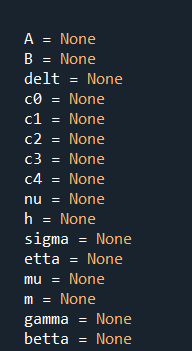

In [69]:
A = 8
T0 = 0
T1 = 365
ModelSol = RightRK45(0.5, 0.3, 0.02, 8, 1, 0.25, 0.1, 0.3, 0.4, 0.1, 0.1, 0.1, 0.25, 0.25, 1, 0.15, 0.5, 0.5, 0.25,T0,T1,0,0,0)

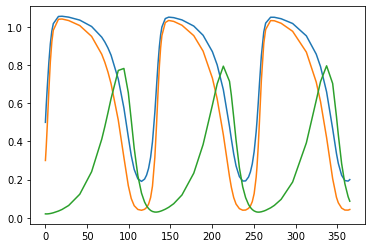

In [70]:
fig, ax = plt.subplots()
ax.plot(ModelSol[3], ModelSol[0])
ax.plot(ModelSol[3], ModelSol[1])
ax.plot(ModelSol[3], ModelSol[2])

Нормы перпендикуляров: {'mu': 5.354257471003792, 'betta': 4.902125012896926, 'c0': 3.7001815033605587, 'etta': 3.5455090541955308, 'h': 3.493720947093827, 'sigma': 2.9411814946849, 'c4': 2.6032387546672417, 'gamma': 2.4171491515577657, 'm': 2.209892763037485, 'B': 2.2063007660663936, 'c1': 1.8666806294487346, 'nu': 1.8481083533130847, 'delta': 1.826470509322222, 'c2': 1.5219844072835351, 'A': 1.3423847566796905, 'c3': 1.2997581448654745}


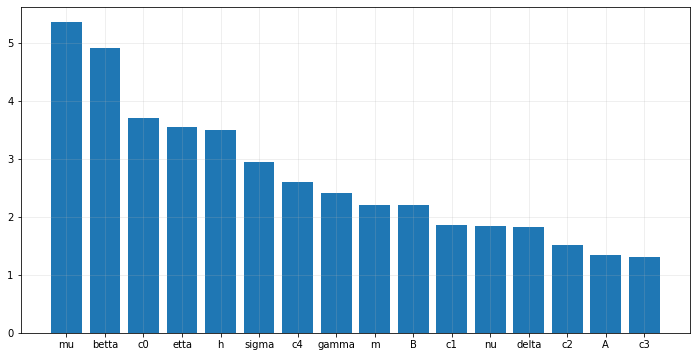

In [79]:
s1 = RightRK45Analys1(
    8, 
    1, 
    0.25,
    0.1,
    0.3,
    0.4,
    0.1,
    0.1,
    0.1,
    0.25,
    0.25,
    1,
    0.15,
    0.5,
    0.5,
    0.25,
    T0,
    T1,
    ModelSol[3],
    ModelSol[0],
    ModelSol[1],
    ModelSol[2],
)
S1 = np.concatenate(
    (
        np.array(s1[0]), 
        np.array(s1[1]), 
        np.array(s1[2]),
    )
)

s2 = RightRK45Analys2(
    8, 
    1,
    0.25,
    0.1,
    0.3,
    0.4,
    0.1,
    0.1,
    0.1,
    0.25,
    0.25,
    1,
    0.15,
    0.5,
    0.5,
    0.25,
    T0,
    T1,
    ModelSol[3],
    ModelSol[0],
    ModelSol[1],
    ModelSol[2],
)
S2 = np.concatenate(
    (
        np.array(s2[0]),
        np.array(s2[1]),
        np.array(s2[2]),
        
    )
)

s3 = RightRK45Analys3(
    8, 
    1, 
    0.25,
    0.1,
    0.3,
    0.4,
    0.1,
    0.1,
    0.1,
    0.25,
    0.25,
    1,
    0.15,
    0.5,
    0.5,
    0.25,
    T0,
    T1,
    ModelSol[3],
    ModelSol[0],
    ModelSol[1],
    ModelSol[2],
)
S3 = np.concatenate(
    (
        np.array(s3[0]),
        np.array(s3[1]),
        np.array(s3[2]),
    )
)

s4 = RightRK45Analys4(
    8, 
    1, 0.25, 0.1, 0.3, 0.4, 0.1, 0.1, 0.1, 0.25, 0.25, 1, 0.15, 0.5, 0.5, 0.25,T0,T1,ModelSol[3],ModelSol[0],ModelSol[1],ModelSol[2])
S4 = np.concatenate((np.array(s4[0]),np.array(s4[1]),np.array(s4[2])))

s5 = RightRK45Analys5(
    8, 
    1, 0.25, 0.1, 0.3, 0.4, 0.1, 0.1, 0.1, 0.25, 0.25, 1, 0.15, 0.5, 0.5, 0.25,T0,T1,ModelSol[3],ModelSol[0],ModelSol[1],ModelSol[2])
S5 = np.concatenate((np.array(s5[0]),np.array(s5[1]),np.array(s5[2])))

s6 = RightRK45Analys6(
    8, 
    1, 0.25, 0.1, 0.3, 0.4, 0.1, 0.1, 0.1, 0.25, 0.25, 1, 0.15, 0.5, 0.5, 0.25,T0,T1,ModelSol[3],ModelSol[0],ModelSol[1],ModelSol[2])
S6 = np.concatenate((np.array(s6[0]),np.array(s6[1]),np.array(s6[2])))

s7 = RightRK45Analys7(8, 1, 0.25, 0.1, 0.3, 0.4, 0.1, 0.1, 0.1, 0.25, 0.25, 1, 0.15, 0.5, 0.5, 0.25,T0,T1,ModelSol[3],ModelSol[0],ModelSol[1],ModelSol[2])
S7 = np.concatenate((np.array(s7[0]),np.array(s7[1]),np.array(s7[2])))

s8 = RightRK45Analys8(8, 1, 0.25, 0.1, 0.3, 0.4, 0.1, 0.1, 0.1, 0.25, 0.25, 1, 0.15, 0.5, 0.5, 0.25,T0,T1,ModelSol[3],ModelSol[0],ModelSol[1],ModelSol[2])
S8 = np.concatenate((np.array(s8[0]),np.array(s8[1]),np.array(s8[2])))

s9 = RightRK45Analys9(8, 1, 0.25, 0.1, 0.3, 0.4, 0.1, 0.1, 0.1, 0.25, 0.25, 1, 0.15, 0.5, 0.5, 0.25,T0,T1,ModelSol[3],ModelSol[0],ModelSol[1],ModelSol[2])
S9 = np.concatenate((np.array(s9[0]),np.array(s9[1]),np.array(s9[2])))

s10 = RightRK45Analys10(8, 1, 0.25, 0.1, 0.3, 0.4, 0.1, 0.1, 0.1, 0.25, 0.25, 1, 0.15, 0.5, 0.5, 0.25,T0,T1,ModelSol[3],ModelSol[0],ModelSol[1],ModelSol[2])
S10 = np.concatenate((np.array(s10[0]),np.array(s10[1]),np.array(s10[2])))

s11 = RightRK45Analys11(8, 1, 0.25, 0.1, 0.3, 0.4, 0.1, 0.1, 0.1, 0.25, 0.25, 1, 0.15, 0.5, 0.5, 0.25,T0,T1,ModelSol[3],ModelSol[0],ModelSol[1],ModelSol[2])
S11 = np.concatenate((np.array(s11[0]),np.array(s11[1]),np.array(s11[2])))

s12 = RightRK45Analys12(8, 1, 0.25, 0.1, 0.3, 0.4, 0.1, 0.1, 0.1, 0.25, 0.25, 1, 0.15, 0.5, 0.5, 0.25,T0,T1,ModelSol[3],ModelSol[0],ModelSol[1],ModelSol[2])
S12 = np.concatenate((np.array(s12[0]),np.array(s12[1]),np.array(s12[2])))

s13 = RightRK45Analys13(8, 1, 0.25, 0.1, 0.3, 0.4, 0.1, 0.1, 0.1, 0.25, 0.25, 1, 0.15, 0.5, 0.5, 0.25,T0,T1,ModelSol[3],ModelSol[0],ModelSol[1],ModelSol[2])
S13 = np.concatenate((np.array(s13[0]),np.array(s13[1]),np.array(s13[2])))

s14 = RightRK45Analys14(8, 1, 0.25, 0.1, 0.3, 0.4, 0.1, 0.1, 0.1, 0.25, 0.25, 1, 0.15, 0.5, 0.5, 0.25,T0,T1,ModelSol[3],ModelSol[0],ModelSol[1],ModelSol[2])
S14 = np.concatenate((np.array(s14[0]),np.array(s14[1]),np.array(s14[2])))

s15 = RightRK45Analys15(8, 1, 0.25, 0.1, 0.3, 0.4, 0.1, 0.1, 0.1, 0.25, 0.25, 1, 0.15, 0.5, 0.5, 0.25,T0,T1,ModelSol[3],ModelSol[0],ModelSol[1],ModelSol[2])
S15 = np.concatenate((np.array(s15[0]),np.array(s15[1]),np.array(s15[2])))

s16 = RightRK45Analys16(8, 1, 0.25, 0.1, 0.3, 0.4, 0.1, 0.1, 0.1, 0.25, 0.25, 1, 0.15, 0.5, 0.5, 0.25,T0,T1,ModelSol[3],ModelSol[0],ModelSol[1],ModelSol[2])
S16 = np.concatenate((np.array(s16[0]),np.array(s16[1]),np.array(s16[2])))


S = np.matrix(
    (
        S1,
        S2,
        S3,
        S4,
        S5,
        S6,
        S7,
        S8,
        S9,
        S10,
        S11,
        S12,
        S13,
        S14,
        S15,
        S16,
    )
)
S = np.transpose(S)

result = SensAnalysis(S)
print('Нормы перпендикуляров:', oo)

result = {k: v for k, v in sorted(oo.items(), key=lambda item: item[1], reverse=True)}

values = []
index = []
for key in result:
    values.append(oo[key])
    index.append(key)

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(index, values)
ax.grid(alpha=0.25)
# plt.xticks(index+0.0,['$\eta$','A','B','$\mu$','$c_2$',chr(957),'$c_3$','$\delta$','$\sigma$','$c_1$','$c_4$','h'])

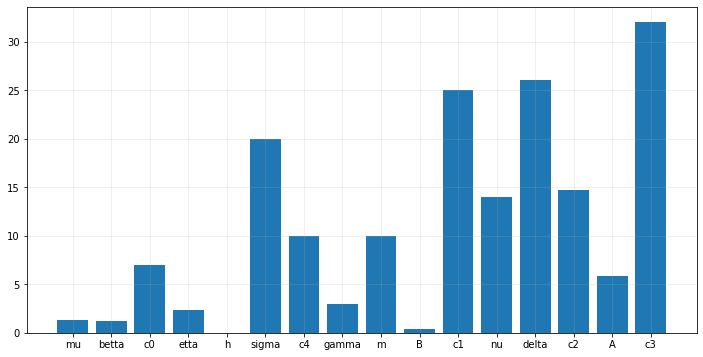

In [82]:
error_values = [1.333, 1.200, 7, 2.3, 0, 20, 10, 3, 10, 0.4, 25, 14, 26, 14.75, 5.825, 32]
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(index, error_values)
ax.grid(alpha=0.25)
print('')

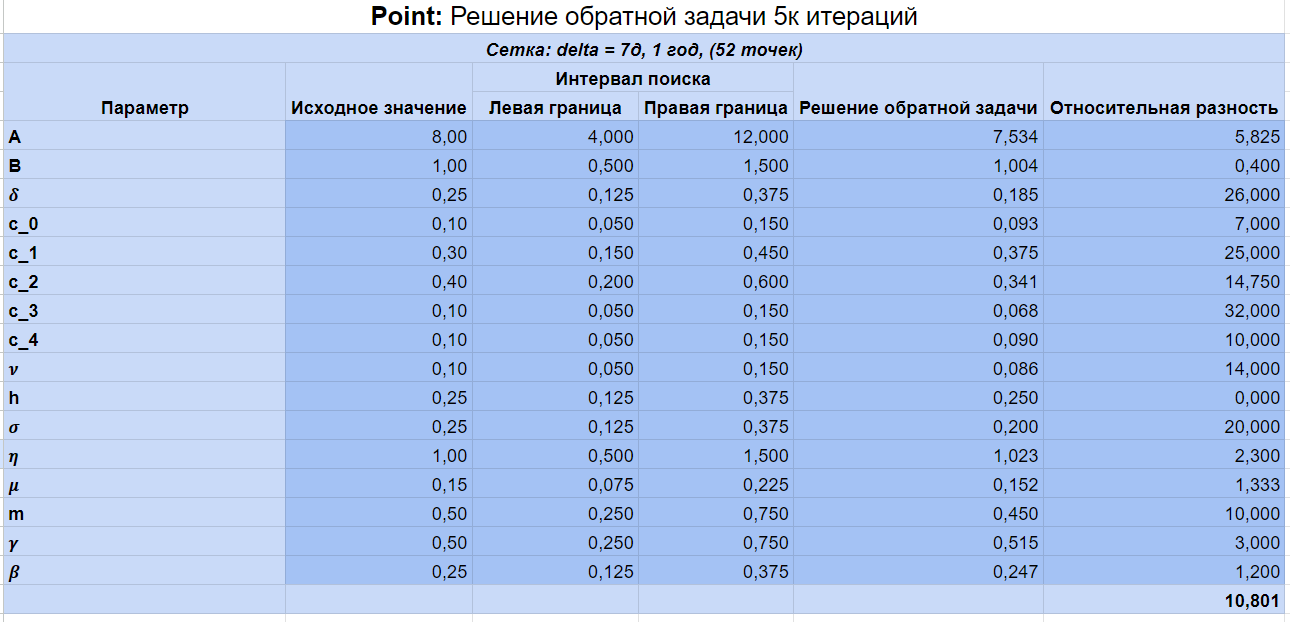